# Mesh 2

Més slope que la mesh1

Density function in `refinter.f90`

    real (r8) function densf(x) result(dens_f)
        real (r8), dimension(1:2), intent(in) :: x
        real (r8), dimension(1:3) :: p
        real (r8) :: lat
        real (r8) :: lon
        real (r8) :: latc
        real (r8) :: lonc
        real (r8) :: radiuse
        real (r8) :: slope
        real (r8) :: epsilons
        real (r8) :: dists
        real (r8) :: maxdist
        real (r8) :: sx

        !Density function parameters
        ! (increase_of_resolution) / (distance)
        slope = 15._r8/300._r8
        ! radius (in km) of high resolution area
        maxdist = 50._r8
        ! distance (in km) of transition zone belt: ratio / slope
        epsilons = 150._r8/slope
        if(epsilons > 10000._r8)then
            epsilons = 10000._r8
        end if

        ! x is the input; the function is called like densf([lat, lon])
        lat = x(1)
        lon = x(2)

        !Center of refined region is 0,-8.4559 in radians (center of pentagon)
        ! TODO cannot do latc=-8.4559
        latc=0._r8
        lonc=0._r8
        !Distance to center ()
        radiuse = 6367._r8
        dists = radiuse * 2 * dasin(dsqrt(dsin((latc - lat) / 2._r8)**2 + dcos(lat) * dcos(latc) * dsin ((lonc-lon) / 2._r8)**2))

        !Distance to center metric
        sx=(dists-maxdist)*slope

        !Set density
        if(dists<=maxdist)then
            !Point close to the center
            dens_f=1.0
        elseif((dists<=maxdist+epsilons) .and. (dists>maxdist))then
            !Point in the transition
            dens_f=1.0 + sx
        else
            !Point far from the center
            dens_f=1.0 + epsilons*slope
        end if

        !Normalization - Make it in [0,1]
        dens_f = 1.0 / dens_f**2
    end function densf


In [1]:
name_test = 'mesh2'

args_mesh = {'mesh2': {
    'slope': 15./300,
    'gammas': 150.,
    'maxdist': 50.,
    'maxepsilons': 10000.
}}

/home/marta/anaconda3/envs/Dades/lib/python3.8/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


Needed cells for lower resolution 1km
72407.98856154915
Number smaller than 15km
65657


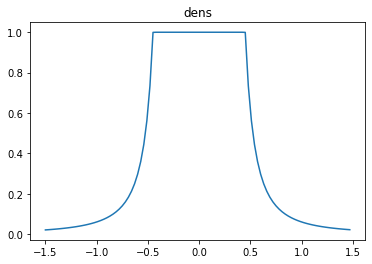

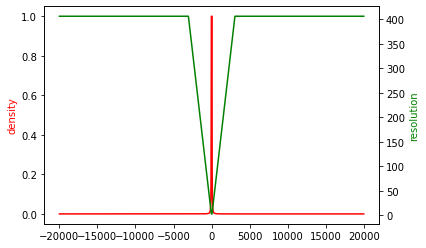

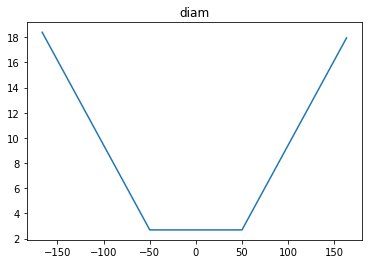

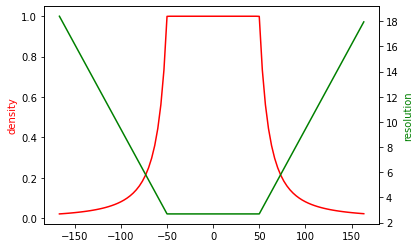

In [2]:
from meshes_funcs import dens2res
res = dens2res(10000, step=0.03, **args_mesh[name_test])

LEVEL 3 MESH
MPAS GRID NOT AVAILABLE
Plot iModel


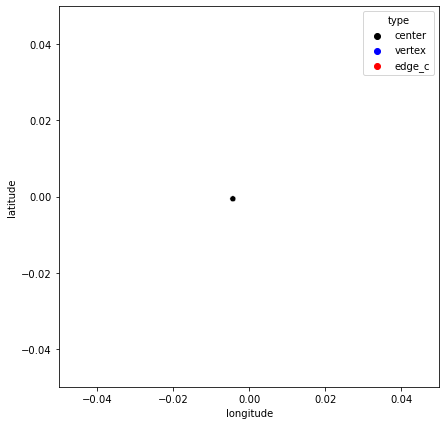

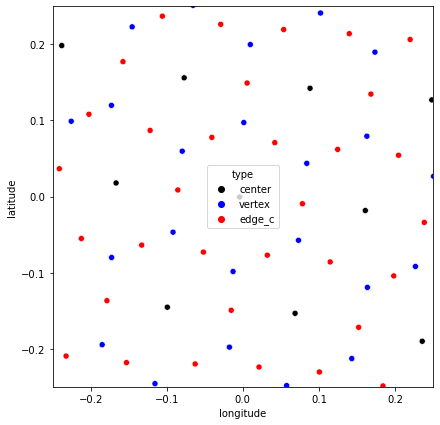

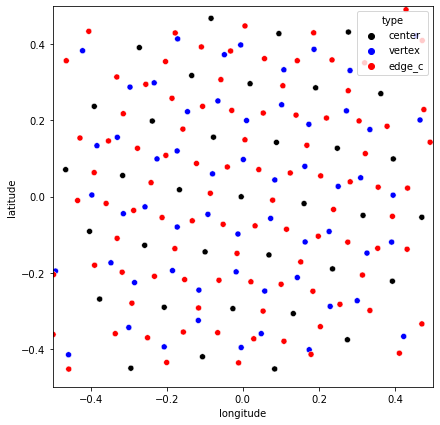

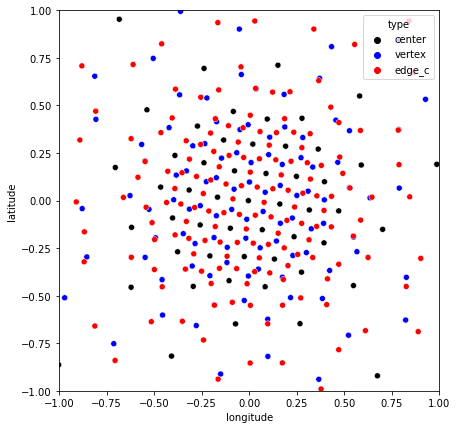

LEVEL 4 MESH
Reading MPAS mesh and loading lats&lons
center
Keyword: Cell
           latCell      lonCell     latitude    longitude
count  2562.000000  2562.000000  2562.000000  2562.000000
mean     -0.000338    -0.010446    -0.019342    -0.598503
std       0.610517     1.609907    34.980047    92.240890
min      -1.530406    -3.141243   -87.685794  -179.979948
25%      -0.382952    -1.167180   -21.941552   -66.874484
50%      -0.000226    -0.000486    -0.012933    -0.027842
75%       0.383445     1.140199    21.969790    65.328616
max       1.558026     3.138465    89.268323   179.820801
vertex
Keyword: Vertex
         latVertex    lonVertex     latitude    longitude
count  5120.000000  5120.000000  5120.000000  5120.000000
mean     -0.000340     0.004924    -0.019464     0.282145
std       0.610439     1.609611    34.975558    92.223936
min      -1.556329    -3.139791   -89.171095  -179.896795
25%      -0.383071    -1.150538   -21.948359   -65.920947
50%       0.000179     0.000283  

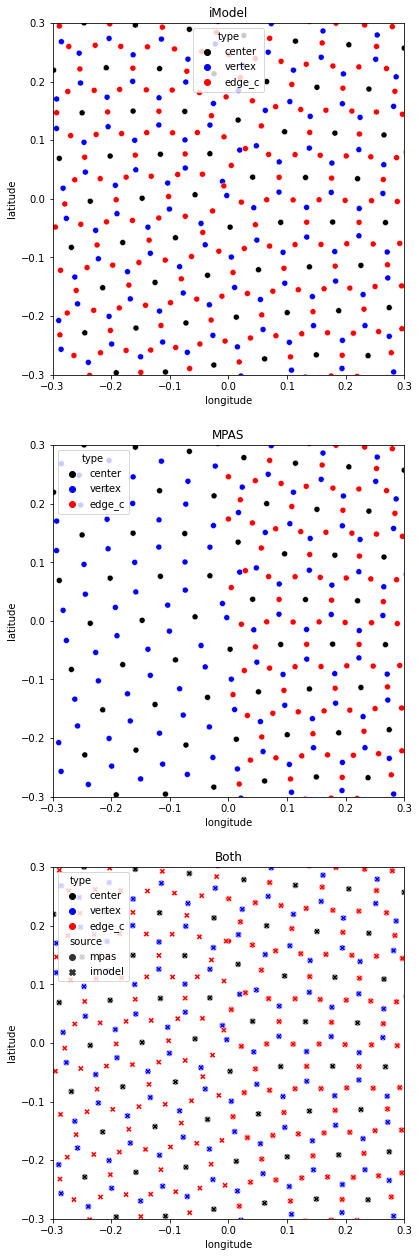

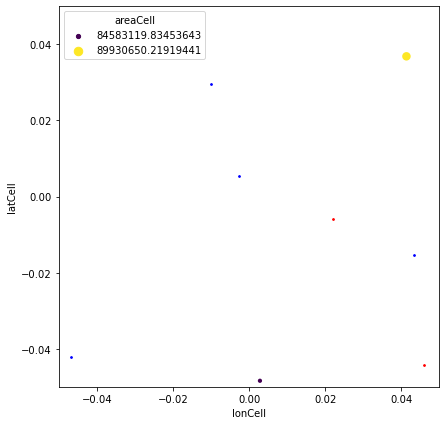

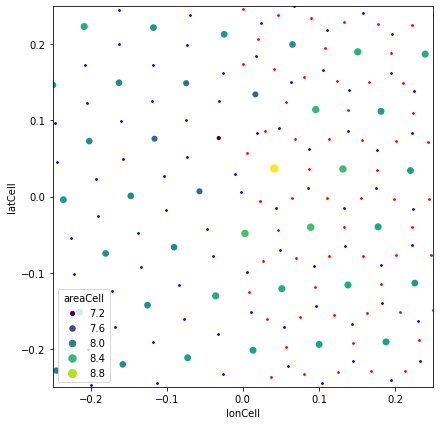

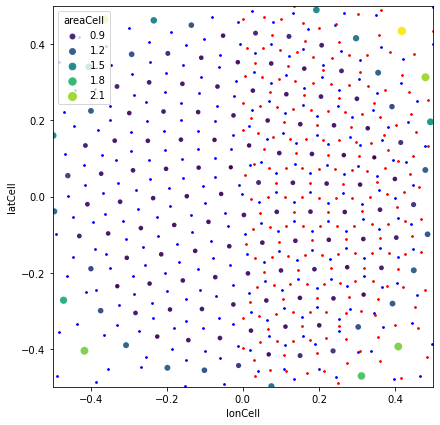

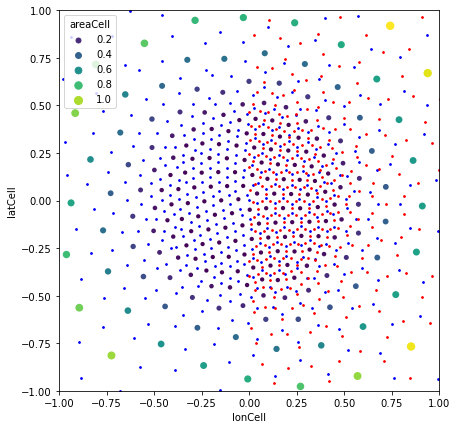

Rescale area to the Earth Sphere


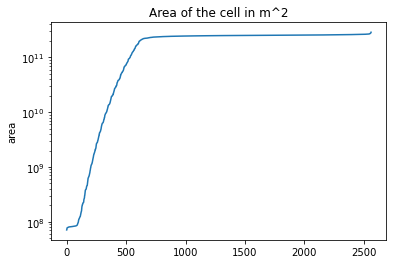

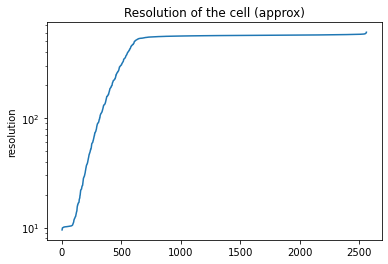

Number smaller than 15km: 
128.0
Resolution of the cell (approx)


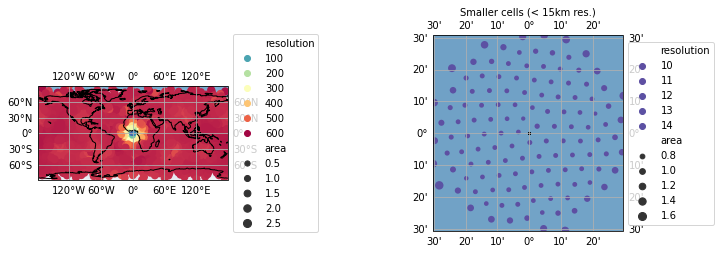

Different Radius


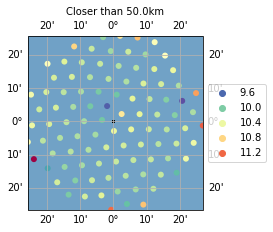

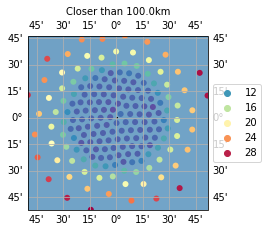

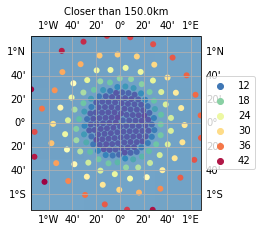

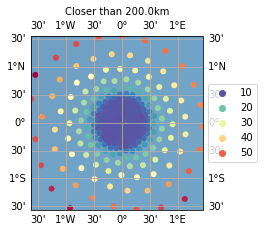

Different highest resolution
No cells with resolution lower than 3.0km
No cells with resolution lower than 5.0km


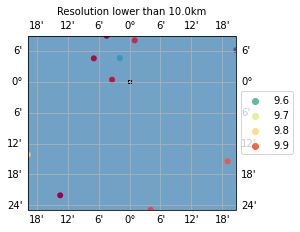

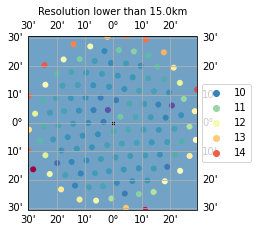

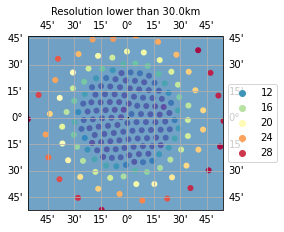

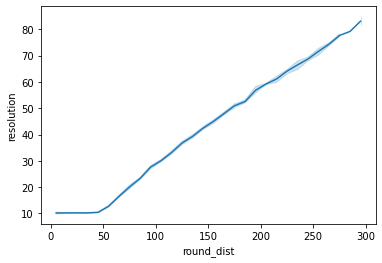

LEVEL 5 MESH
MPAS GRID NOT AVAILABLE
Plot iModel


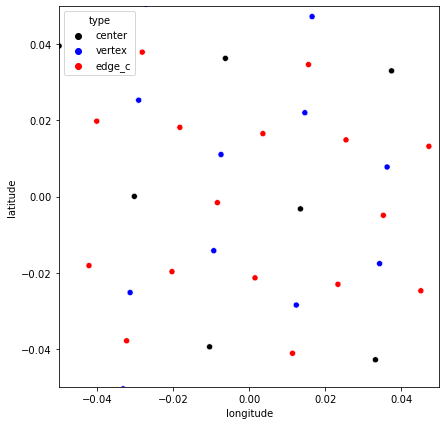

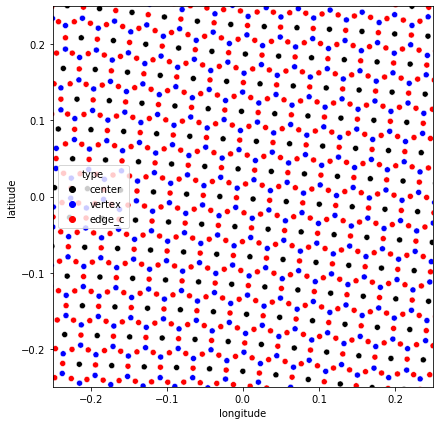

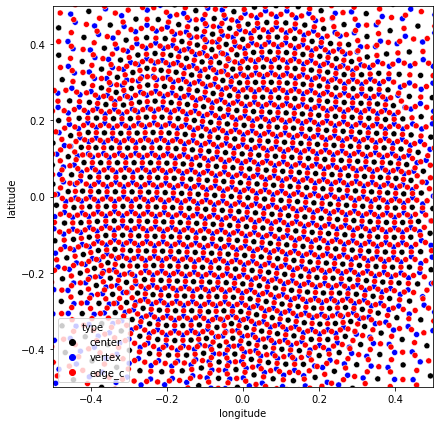

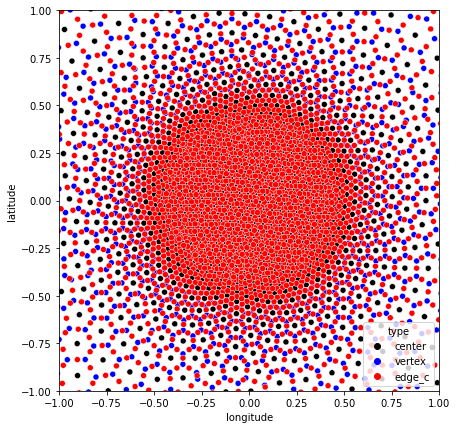

LEVEL 6 MESH
MPAS GRID NOT AVAILABLE
Plot iModel


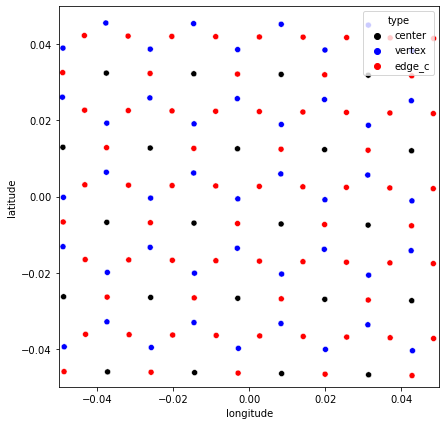

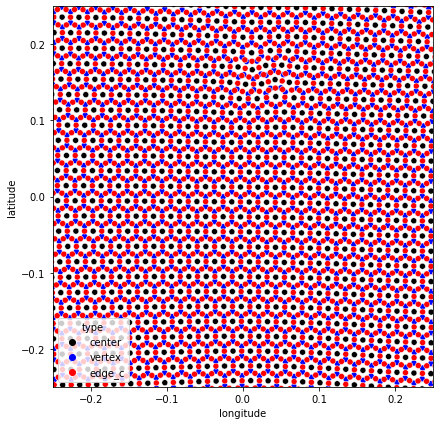

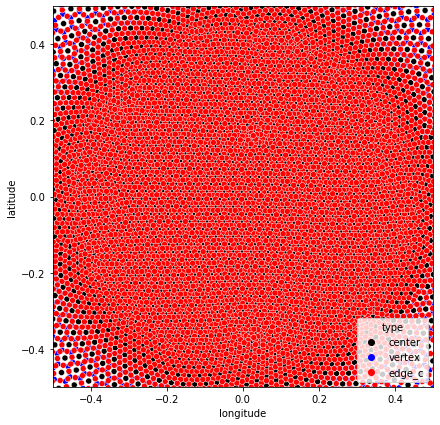

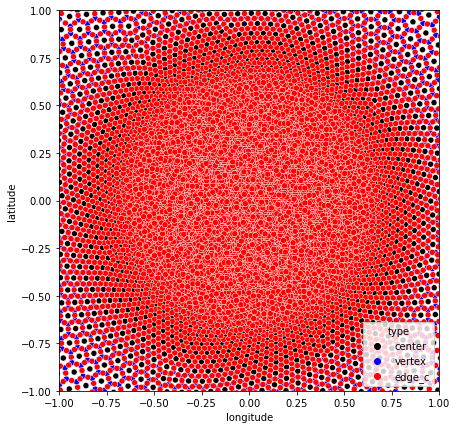

In [3]:
from meshes_funcs import study_mesh, center_hex_tr, \
    mpas_center_hex_tr, compare_imodel_mpas
import glob
import os

imodel_meshes = name_test + '/grids/'
files = sorted(glob.glob(name_test + '/meshes/*_grid.nc'))

lims = [0.05, 0.25, 0.5, 1]
for lev in ['3', '4', '5', '6']:

    print('LEVEL ' + lev + ' MESH')
    file = name_test + '/meshes/' + name_test + '-lev' + lev + '_grid.nc'
    if not os.path.exists(file):
        print('MPAS GRID NOT AVAILABLE')

        print('Plot iModel')
        for lim in lims:
            center_hex_tr(folder=imodel_meshes,
                          name='icos_ref_scvt_h1_' + lev,
                          lim=lim)
        continue

    compare_imodel_mpas(file,
                        imodel_meshes,
                        'icos_ref_scvt_h1_' + lev,
                        lim=0.3)

    for lim in lims:
        mpas_center_hex_tr(file, lim=lim)

    study_mesh(file)